<a href="https://colab.research.google.com/github/Dsasank81/Coding-Raja-Task-1-2-/blob/main/Hex_Softwares_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


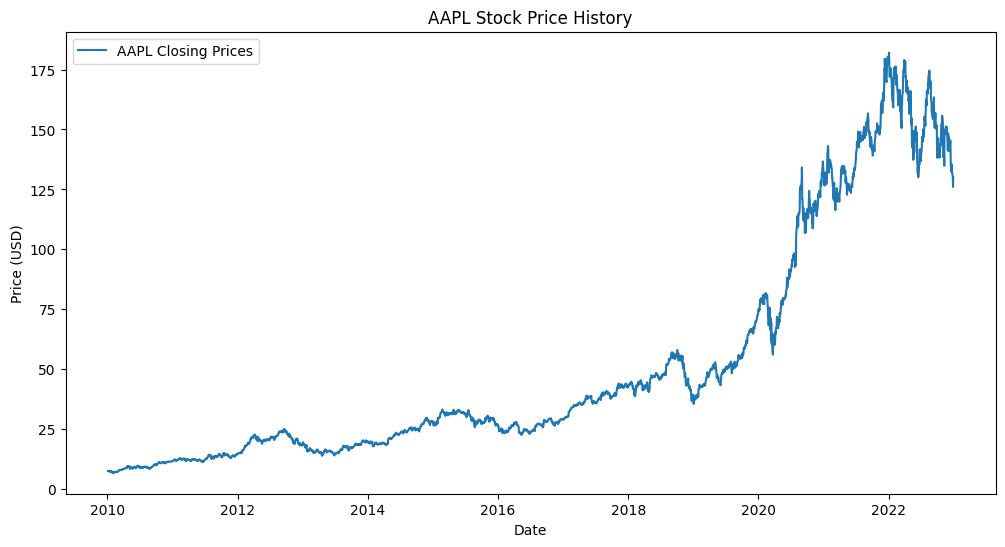

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0075 - val_loss: 0.0096
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 3.6010e-04 - val_loss: 0.0017
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 2.6019e-04 - val_loss: 0.0013
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1383e-04 - val_loss: 0.0012
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 2.3907e-04 - val_loss: 0.0011
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.0008e-04 - val_loss: 0.0025
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.5350e-04 - val_loss: 0.0042
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 2.0095e-04 - val_loss: 0.0017
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 1.6872e-04 - val_loss: 0.0010
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 1.6047e-04 - val_loss: 0.0010
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 1.4511e-04 - val_loss: 0.0029
Epoch 12/50
40/40 ━━

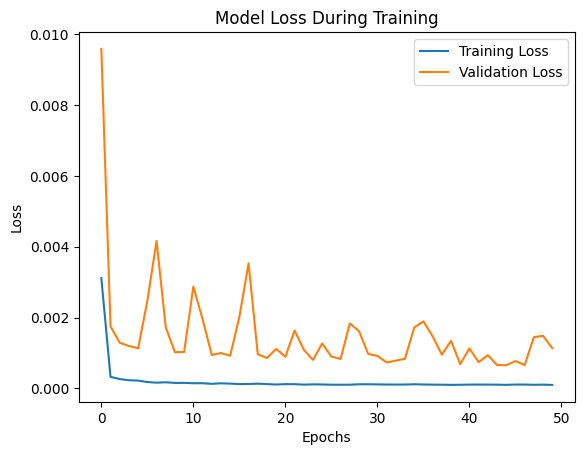

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


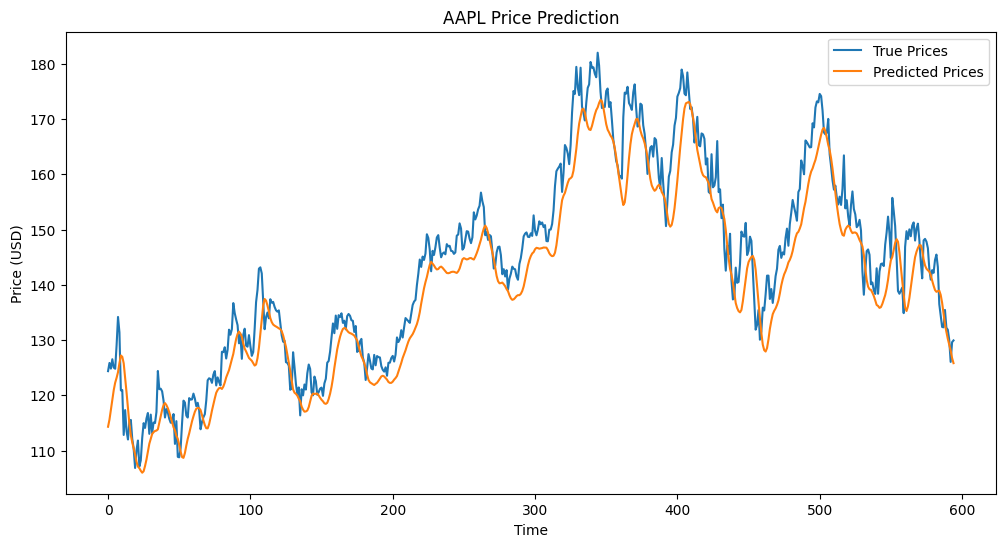

In [1]:
# Task -1
# Install necessary libraries
#!pip install yfinance matplotlib scikit-learn tensorflow

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load historical stock data
stock_ticker = 'AAPL'  # Replace with your preferred stock ticker
data = yf.download(stock_ticker, start="2010-01-01", end="2023-01-01")
data = data[['Close']]  # Use the 'Close' price

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{stock_ticker} Closing Prices')
plt.title(f'{stock_ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create a dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Prepare the data
time_step = 60  # Number of days to look back
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Evaluate
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(true_prices, label='True Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'{stock_ticker} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Saving heart.csv to heart.csv
Dataset Preview:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4         

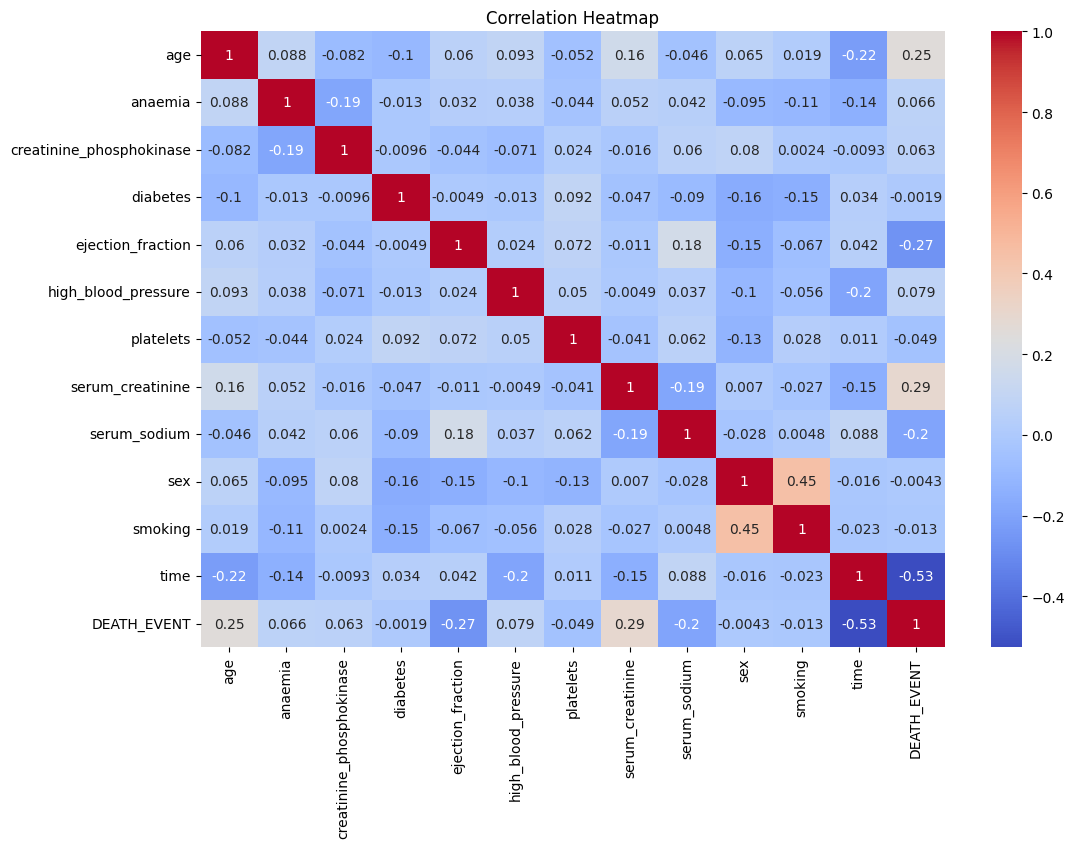

KeyError: "['target'] not found in axis"

In [3]:
# project -2
# Install necessary libraries
# !pip install pandas matplotlib scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset (Upload 'heart.csv' to Colab or use a file path)
from google.colab import files
uploaded = files.upload()

# Read the dataset
data = pd.read_csv('heart.csv')  # Replace 'heart.csv' with your file name

# Explore the dataset
print("Dataset Preview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(data.describe())

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Features and target
X = data.drop(columns=['target'])  # 'target' is the dependent variable
y = data['target']  # 1 indicates heart disease, 0 indicates no heart disease

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test the model with new data
new_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example patient data
new_patient_scaled = scaler.transform(new_patient)
prediction = model.predict(new_patient_scaled)
print(f"\nPrediction for new patient: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")


In [10]:
# Install necessary libraries
!pip install pandas scikit-learn surprise matplotlib

# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
import random

# Generate synthetic movies dataset
movies = pd.DataFrame({
    'movieId': range(1, 11),
    'title': [
        'Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
        'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
        'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
        'Sudden Death (1995)', 'GoldenEye (1995)'
    ],
    'genres': [
        'Adventure Animation Children Comedy Fantasy',
        'Adventure Children Fantasy',
        'Comedy Romance',
        'Comedy Drama Romance',
        'Comedy',
        'Action Crime Thriller',
        'Comedy Romance',
        'Adventure Children',
        'Action',
        'Action Adventure Thriller'
    ]
})

# Generate synthetic ratings dataset
random.seed(42)
ratings = pd.DataFrame({
    'userId': np.random.randint(1, 6, 50),  # 5 users
    'movieId': np.random.randint(1, 11, 50),  # 10 movies
    'rating': np.random.uniform(1, 5, 50).round(1)  # Ratings from 1.0 to 5.0
})

# Preview datasets
print("Movies Dataset:")
print(movies.head())

print("\nRatings Dataset:")
print(ratings.head())

# Collaborative Filtering with Surprise
# Prepare data for Surprise library
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use Singular Value Decomposition (SVD)
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
print("\nRMSE for Collaborative Filtering:")
rmse(predictions)

# Predict movies for a specific user
def recommend_collaborative(user_id, n_recommendations=5):
    user_ratings = ratings[ratings['userId'] == user_id]
    watched_movies = user_ratings['movieId'].values
    all_movies = movies['movieId'].unique()
    recommendations = []

    for movie_id in all_movies:
        if movie_id not in watched_movies:
            pred = model.predict(user_id, movie_id)
            recommendations.append((movie_id, pred.est))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_movies = recommendations[:n_recommendations]
    return [movies[movies['movieId'] == movie_id]['title'].values[0] for movie_id, _ in top_movies]

# Test collaborative filtering recommendations
user_id = 1
print(f"\nTop Collaborative Filtering Recommendations for User {user_id}:")
print(recommend_collaborative(user_id))

# Content-Based Filtering
# Preprocess genres for content-based filtering
movies['genres'] = movies['genres'].str.replace('|', ' ')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommend movies based on a movie title
def recommend_content_based(movie_title, n_recommendations=5):
    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n_recommendations + 1]
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices]['title'].values

# Test content-based filtering recommendations
movie_title = "Toy Story (1995)"
print(f"\nTop Content-Based Recommendations for '{movie_title}':")
print(recommend_content_based(movie_title))

# Hybrid Recommendation (Combine Collaborative and Content-Based)
def hybrid_recommendation(user_id, movie_title, n_recommendations=5):
    collab_recommendations = recommend_collaborative(user_id, n_recommendations)
    content_recommendations = recommend_content_based(movie_title, n_recommendations)
    return list(set(collab_recommendations + list(content_recommendations)))

# Test hybrid recommendations
print(f"\nHybrid Recommendations for User {user_id} and Movie '{movie_title}':")
print(hybrid_recommendation(user_id, movie_title))


Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure Animation Children Comedy Fantasy  
1                   Adventure Children Fantasy  
2                               Comedy Romance  
3                         Comedy Drama Romance  
4                                       Comedy  

Ratings Dataset:
   userId  movieId  rating
0       2        2     2.5
1       2       10     3.4
2       2        8     3.2
3       2        9     4.9
4       3        2     3.5

RMSE for Collaborative Filtering:
RMSE: 1.1171

Top Collaborative Filtering Recommendations for User 1:
['Tom and Huck (1995)', 'Father of the Bride Part II (1995)', 'Grumpier Old Men (1995)']

Top Content-Ba